In [40]:
# https://gis.stackexchange.com/questions/281652/finding-all-neighbors-using-geopandas


In [17]:
import folium 
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

In [100]:
url="https://data.montreal.ca/dataset/9797a946-9da8-41ec-8815-f6b276dec7e9/resource/e18bfd07-edc8-4ce8-8a5a-3b617662a794/download/limites-administratives-agglomeration.geojson"
gdf = gpd.read_file(url)

In [101]:
gdf.columns = gdf.columns.str.lower()

<Axes: >

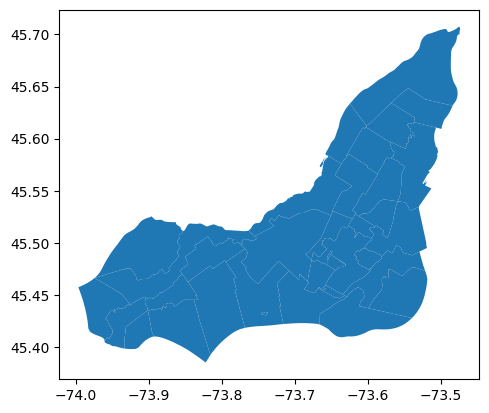

In [103]:
gdf.geometry.plot()

In [104]:
# import pandas as pd
# pd.set_option('display.max_colwidth', None)
# gdf.geometry[0].touches

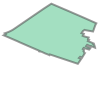

In [105]:
pd.set_option('display.max_colwidth', None)

gdf.geometry[0]

In [106]:
gdf["neighbors"] = None

for index, row in gdf.iterrows(): 
    neighbors = gdf[gdf.geometry.touches(row['geometry'])].abrev.tolist()
    neighbors = [ name for name in neighbors if row.abrev != name ]
    gdf.at[index, "neighbors"] = ", ".join(neighbors)

In [107]:
gdf[["abrev", "neighbors"]].head(4)

,abrev,neighbors
0,AJ,"MH, RP, ME, MN, LN"
1,PC,"KL, DO, BF, DV"
2,RO,"MH, PM, VS, LN, OM, VM"
3,KL,"PC, BV, DO, BF, PR"


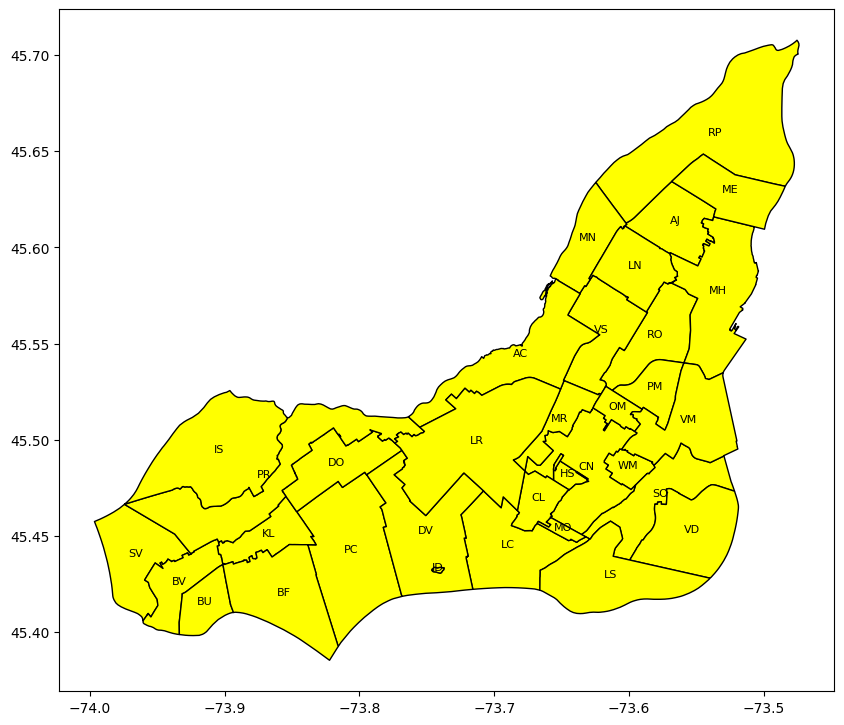

In [108]:
fig, ax = plt.subplots(figsize = (10,10))
ax = gdf.plot(ax=ax, color='yellow', edgecolor='black')

gdf.apply(
    lambda x: ax.annotate(
        text=x['abrev'], 
        xy=x.geometry.centroid.coords[0], 
        ha='center', 
        fontsize=8), 
    axis=1);

In [109]:
# Get unique polygon abbreviations
abrevs = gdf['abrev'].unique()

# Initialize adjacency matrix
adj_mat = np.zeros((len(abrevs), len(abrevs)), dtype=int)

# Loop through polygons and their neighbors
for index, row in gdf.iterrows():
    neighbors = row['neighbors'].split(', ')
    for neighbor in neighbors:
        adj_mat[np.where(abrevs == row['abrev'])[0][0], np.where(abrevs == neighbor)[0][0]] = 1
        

In [110]:
# Set diagonal to 1 to indicate that a polygon is adjacent to itself
np.fill_diagonal(adj_mat, 1)

In [111]:
adj_mat

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [118]:
# # https://github.com/mleila/map-grapher/blob/master/map_grapher/core.py

# def adjacency_test(county1, county2):
#     return not county1.intersection(county2).is_empty

# nb_counties = len(gdf)
# idx_name_map = {}
# mat = []
# for idx in range(nb_counties):
#     county_name = gdf.loc[idx]['abrev']
#     idx_name_map[idx] = county_name
#     county_geo = gdf.loc[idx]['geometry']
#     lst = []
#     for other_idx in range(nb_counties):
#         other_geo = gdf.loc[other_idx]['geometry']
#         if adjacency_test(county_geo, other_geo):
#             lst.append(1)
#         else:
#             lst.append(0)
#     mat.append(lst)

In [113]:
# import numpy as np

# print(np.matrix(mat))

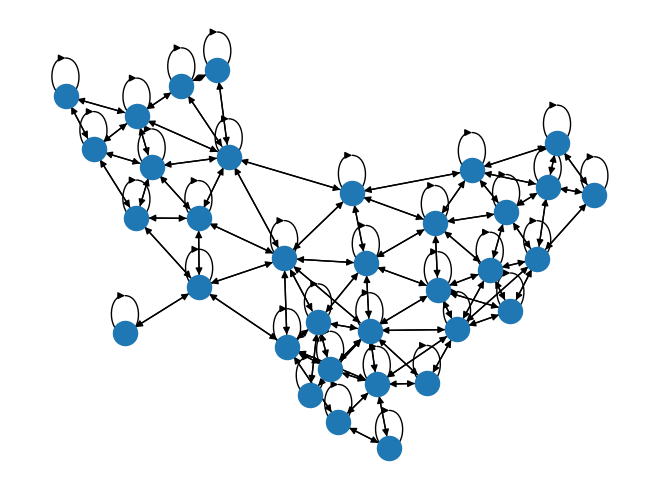

In [114]:
import networkx as nx

G = nx.DiGraph(np.array(adj_mat)) 
nx.draw(G)
plt.show()

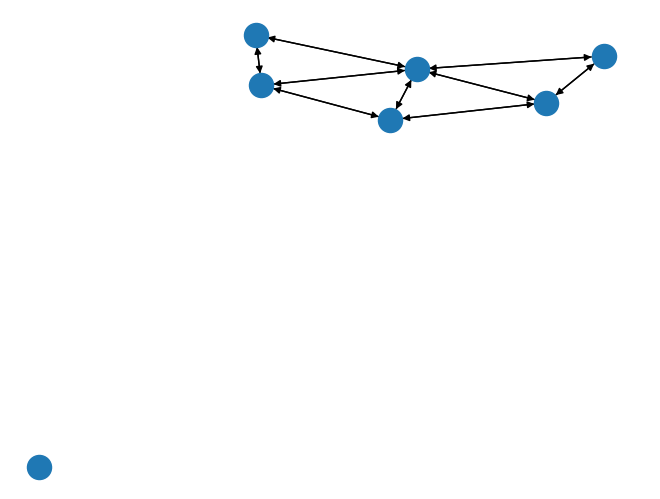

In [115]:
AustraliaMap=[
    [0,1,1,0,0,0,0],
    [1,0,1,1,0,0,0],
    [1,1,0,1,1,1,0],
    [0,1,1,0,1,0,0],
    [0,0,1,1,0,1,0],
    [0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0],
]

E = nx.DiGraph(np.array(AustraliaMap)) 
nx.draw(E)
plt.show()